In [1]:
# dependencies and Setup
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# hide warning message in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# file to load
clinical_data_path = os.path.join("..", "Instructions", "Pymaceuticals", "data", "clinicaltrial_data.csv")
mouse_drug_data_path = os.path.join("..", "Instructions", "Pymaceuticals", "data", "mouse_drug_data.csv")

In [3]:
# read the data
clinical_data = pd.read_csv(clinical_data_path)
mouse_data = pd.read_csv(mouse_drug_data_path)

In [4]:
# decide the way to merge
print(len(clinical_data["Mouse ID"].value_counts()) == len(mouse_data["Mouse ID"].value_counts()))
print("--------------------")
print(clinical_data.count())
print("--------------------")
print(mouse_data.count())
print("--------------------")
print("As we can tell, we should implement left merge")

True
--------------------
Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64
--------------------
Mouse ID    250
Drug        250
dtype: int64
--------------------
As we can tell, we should implement left merge


In [5]:
# combine the data into a single dataset
merged_data = pd.merge(clinical_data, mouse_data, how="left", on="Mouse ID")

In [6]:
# display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [7]:
# get the column indexes
merged_data.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug'],
      dtype='object')

## Tumor Response to Treatment

In [8]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_data = merged_data.groupby(["Drug", "Timepoint"])
mean_tv = grouped_data["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tv_df = pd.DataFrame({"Tumor Volume (mm3)": mean_tv})

# reset the index
mean_tv_df = mean_tv_df.reset_index()

# Preview DataFrame
mean_tv_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tv = grouped_data["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
sem_tv_df = pd.DataFrame({"Tumor Volume (mm3)": sem_tv})

# reset the index
sem_tv_df = sem_tv_df.reset_index()

# Preview DataFrame
sem_tv_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [10]:
# Minor Data Munging to Re-Format the Data Frames
rf_mean_tv_df = mean_tv_df.set_index("Timepoint")
rf_mean_tv_df = rf_mean_tv_df.pivot(columns="Drug", values="Tumor Volume (mm3)")
rf_sem_tv_df = sem_tv_df.set_index("Timepoint")
rf_sem_tv_df = rf_sem_tv_df.pivot(columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting worked
rf_mean_tv_df
rf_sem_tv_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


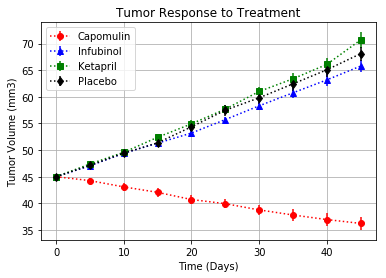

In [11]:
# Generate the Plot (with Error Bars)
selected_drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plt.errorbar(x=rf_mean_tv_df.index, y=rf_mean_tv_df[selected_drugs[0]], yerr=rf_sem_tv_df[selected_drugs[0]], color="red",marker="o", ls=":")
plt.errorbar(x=rf_mean_tv_df.index, y=rf_mean_tv_df[selected_drugs[1]], yerr=rf_sem_tv_df[selected_drugs[1]], color="blue",marker="^", ls=":")
plt.errorbar(x=rf_mean_tv_df.index, y=rf_mean_tv_df[selected_drugs[2]], yerr=rf_sem_tv_df[selected_drugs[2]], color="green",marker="s", ls=":")
plt.errorbar(x=rf_mean_tv_df.index, y=rf_mean_tv_df[selected_drugs[3]], yerr=rf_sem_tv_df[selected_drugs[3]], color="black",marker="d", ls=":")

plt.legend()
plt.grid(b=True)
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")

# Save the Figure
fig1_path = os.path.join("..", "Pymac - My Solution", "Tumor Response to Treatment")
figure1 = plt.gcf()
figure1.savefig(fig1_path, dpi = 1200)

In [12]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
mean_ms_df = pd.DataFrame({"Metastatic Sites": grouped_data["Metastatic Sites"].mean()})

# reset the index
mean_ms_df = mean_ms_df.reset_index()

# Preview DataFrame
mean_ms_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [14]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
sem_ms_df = pd.DataFrame({"Metastatic Sites": grouped_data["Metastatic Sites"].sem()})

# reset the index
sem_ms_df = sem_ms_df.reset_index()

# Preview DataFrame
sem_ms_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [15]:
# Minor Data Munging to Re-Format the Data Frames
rf_mean_ms_df = mean_ms_df.set_index("Timepoint")
rf_mean_ms_df = rf_mean_ms_df.pivot(columns="Drug", values="Metastatic Sites")
rf_sem_ms_df = sem_ms_df.set_index("Timepoint")
rf_sem_ms_df = rf_sem_ms_df.pivot(columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
rf_mean_ms_df
rf_sem_ms_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


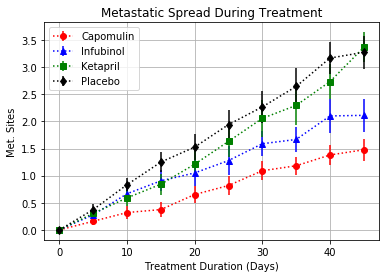

In [16]:
# Generate the Plot (with Error Bars)
selected_drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plt.errorbar(x=rf_mean_ms_df.index, y=rf_mean_ms_df[selected_drugs[0]], yerr=rf_sem_ms_df[selected_drugs[0]], color="red",marker="o", ls=":")
plt.errorbar(x=rf_mean_ms_df.index, y=rf_mean_ms_df[selected_drugs[1]], yerr=rf_sem_ms_df[selected_drugs[1]], color="blue",marker="^", ls=":")
plt.errorbar(x=rf_mean_ms_df.index, y=rf_mean_ms_df[selected_drugs[2]], yerr=rf_sem_ms_df[selected_drugs[2]], color="green",marker="s", ls=":")
plt.errorbar(x=rf_mean_ms_df.index, y=rf_mean_ms_df[selected_drugs[3]], yerr=rf_sem_ms_df[selected_drugs[3]], color="black",marker="d", ls=":")

plt.legend()
plt.grid(b=True)
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment")

# Save the Figure
fig2_path = os.path.join("..", "Pymac - My Solution", "Metastatic Spread During Treatment")
figure2 = plt.gcf()
figure2.savefig(fig2_path, dpi = 1200)

In [17]:
# Show the Figure
plt.show()

## Survival Rates

In [18]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
mouseCount_df = pd.DataFrame({"Mouse Count": grouped_data["Mouse ID"].count()})
mouseCount_df = mouseCount_df.reset_index()

# Preview DataFrame
mouseCount_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [19]:
# Minor Data Munging to Re-Format the Data Frames
rf_mouseCount_df = mouseCount_df.pivot(index="Timepoint", columns="Drug", values="Mouse Count")

# Preview the Data Frame
rf_mouseCount_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


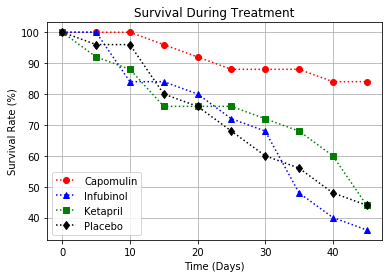

In [20]:
# Generate the Plot (Accounting for percentages)
selected_drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
# rf_mouseCount_df[selected_drugs].plot(kind="line", grid=True)

plt.plot(rf_mouseCount_df.index, 100*rf_mouseCount_df[selected_drugs[0]]/rf_mouseCount_df[selected_drugs[0]][0], color="red",marker="o", ls=":")
plt.plot(rf_mouseCount_df.index, 100*rf_mouseCount_df[selected_drugs[1]]/rf_mouseCount_df[selected_drugs[1]][0], color="blue",marker="^", ls=":")
plt.plot(rf_mouseCount_df.index, 100*rf_mouseCount_df[selected_drugs[2]]/rf_mouseCount_df[selected_drugs[2]][0], color="green",marker="s", ls=":")
plt.plot(rf_mouseCount_df.index, 100*rf_mouseCount_df[selected_drugs[3]]/rf_mouseCount_df[selected_drugs[3]][0], color="black",marker="d", ls=":")

plt.legend()
plt.grid(b=True)
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")

# Save the Figure
fig3_path = os.path.join("..", "Pymac - My Solution", "Survival During Treatment")
figure3 = plt.gcf()
figure3.savefig(fig3_path, dpi = 1200)

In [21]:
# Show the Figure
plt.show()

## Summary Bar Graph

In [22]:
# Calculate the percent changes for each drug
percent_changes = (rf_mean_tv_df.iloc[-1,:]/rf_mean_tv_df.iloc[0,:]-1)*100

# Display the data to confirm
percent_changes

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

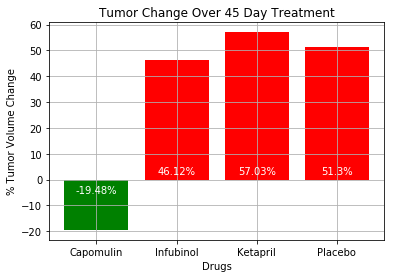

In [23]:
selected_drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
# plt.bar(percent_changes[selected_drugs].index, height=percent_changes[selected_drugs])

fig, ax = plt.subplots()
rects1 = ax.bar(selected_drugs, percent_changes[selected_drugs], color="r")
rects2 = ax.bar(selected_drugs[0], percent_changes[selected_drugs[0]], color="g")


# Use functions to label the percentages of changes
def autolabel(rects, ax):
    (y_bottom, y_top) = ax.get_ylim()
    font_height = 5
    
    for rect in rects1:
        height = round(rect.get_height(),2)
        
        if height < 0:
            label_position = -y_top*0.02-font_height
        elif height > 0:
            label_position = y_top*0.02
            
        ax.text(x=rect.get_x()+rect.get_width()/2, y=label_position, fontsize=10,
                s=f"{height}%", ha='center', va='bottom', color="white")
        
# Call functions to implement the function calls 
autolabel(rects1, ax)

# Add labels, titles, etc. 
plt.grid(b=True)
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")

# Save the Figure
fig4_path = os.path.join("..", "Pymac - My Solution", "Tumor Change Over 45 Day Treatment-Bar Chart")
figure4 = plt.gcf()
figure4.savefig(fig4_path, dpi = 1200)

In [24]:
# Show the Figure
plt.show()

# My Analysis

* Among the selected drugs ("Capomulin", "Infubinol", "Ketapril", "Placebo"), Capomulin has the best effect of treating the tumor. After taking Capomulin, the tumor volume decreased by 19.48% after the 45-day treatment, while it increased by 46%-57% if taking Infubinol, Ketapril or Placebo.

* Among the selected drugs ("Capomulin", "Infubinol", "Ketapril", "Placebo"), all of them cannot prevent the metastatic spread of tumor. However, Capomulin can minimize the metastatic spread.

* All the selected drugs ("Capomulin", "Infubinol", "Ketapril", "Placebo") cannot cure 100% of the tumor. The good news is the survival rate reaches around 85% after 45-day treatment with Capomulin, while other treatment approaches can only achieve 40-50% survival rate.

* In the nutshell, Capomulin is the best among the selected drugs.